In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
locations = pd.read_stata("location_classifications/location.dta")
locations['location_id'] = locations['location_id'].astype(int)
locations.drop(columns = ['location_id','location_name_short_en','level'], inplace = True)

In [18]:
with open('graphs/import_graphs.pkl', 'rb') as file:
    import_graphs = pkl.load(file)

In [19]:
with open('graphs/export_graphs.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [20]:
density_exports = []
for i in export_graphs:
    density_exports.append(nx.density(i))

In [21]:
density_imports = []
for i in import_graphs:
    density_imports.append(nx.density(i))

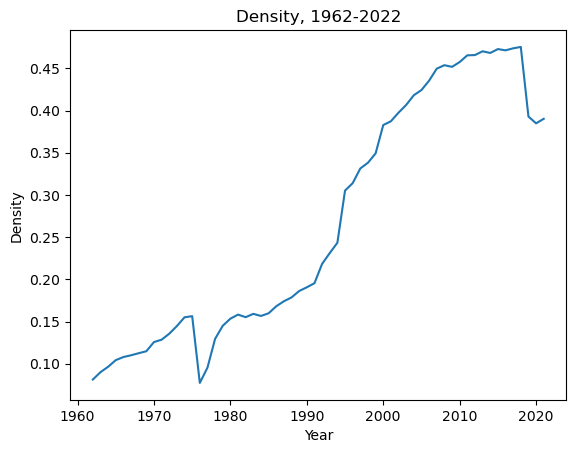

In [22]:
x = range(1962,2022)

# Plot the data on the first subplot
plt.plot(x, density_exports)

plt.title('Density, 1962-2022')
plt.ylabel('Density')
plt.xlabel('Year')
# Show the figure
plt.show()

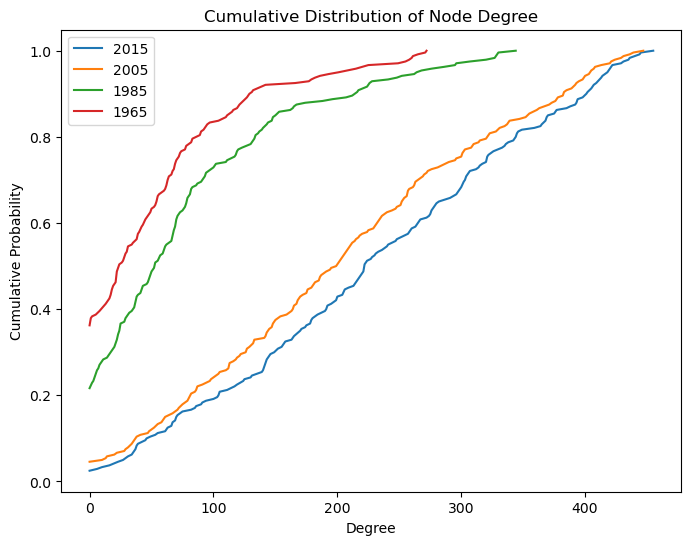

In [24]:
from collections import Counter

# Function to compute cumulative distribution
def compute_cumulative_distribution(G):
    degrees = dict(G.degree())
    degree_values = sorted(set(degrees.values()))
    cumulative_distribution = [sum(1 for d in degrees.values() if d <= degree) / nx.number_of_nodes(G) for degree in degree_values]
    return degree_values, cumulative_distribution

# Load network data for each year
# Assuming you have data for multiple years stored in separate files
years = [export_graphs[53], export_graphs[43], export_graphs[23], export_graphs[3]]  # Update with your actual file paths
labels = ['2015', '2005', '1985','1965']  # Update with the years you have data for
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for i, year_data in enumerate(years):
    degree_values, cumulative_distribution = compute_cumulative_distribution(year_data)
    plt.plot(degree_values, cumulative_distribution, linestyle='-', label=labels[i])

# Plot settings
plt.title('Cumulative Distribution of Node Degree')
plt.xlabel('Degree')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

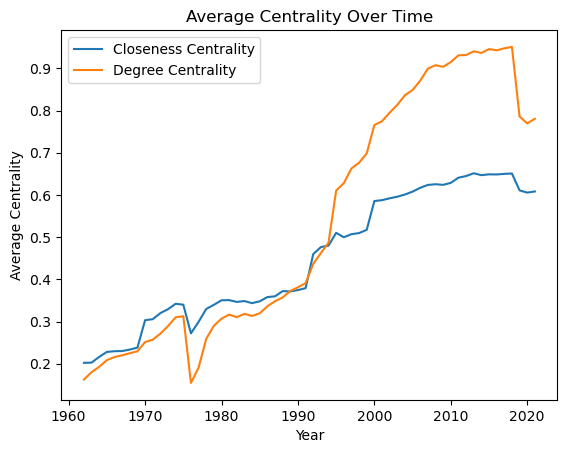

In [32]:
# Function to compute average degree centrality
def compute_avg_closeness_centrality(G):
    closeness_centrality = nx.closeness_centrality(G)
    avg_closeness_centrality = sum(closeness_centrality.values()) / len(closeness_centrality)
    return avg_closeness_centrality

# Function to compute average degree centrality
def compute_avg_degree_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
    return avg_degree_centrality

# Load network data for each year
# Assuming you have data for multiple years stored in separate files
labels = range(1962,2022)  # Update with the years you have data for

# Compute average degree centrality for each year
avg_degree_centralities = [compute_avg_degree_centrality(year_data) for year_data in export_graphs]
avg_closeness_centralities = [compute_avg_closeness_centrality(year_data) for year_data in export_graphs]

# Plot average degree centrality over time
plt.plot(labels, avg_closeness_centralities, label = "Closeness Centrality")
plt.plot(labels, avg_degree_centralities, label = "Degree Centrality")
plt.title('Average Centrality Over Time')
plt.xlabel('Year')
plt.ylabel('Average Centrality')
plt.legend()
plt.show()

## Charting Total Export and Import Volumes

In [12]:
with open('graphs/exports_agg.pkl', 'rb') as file:
    export_agg = pkl.load(file)

In [13]:
total_exports = [df['export_value'].sum() for df in export_agg]

In [16]:
# Calculate the growth values
export_growth_values = np.diff(total_exports) / total_exports[:-1]

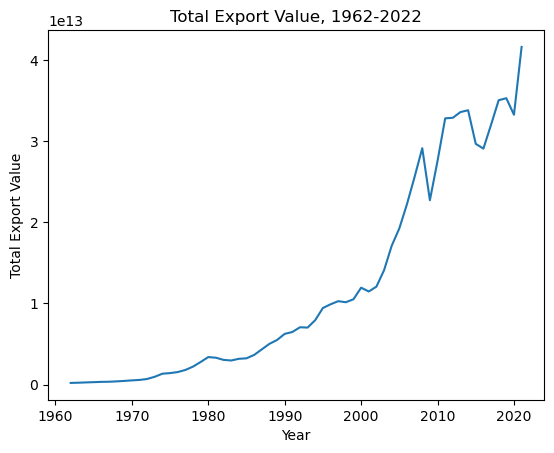

In [17]:
years = range(1962,2022)

plt.plot(years, total_exports)
plt.title('Total Export Value, 1962-2022')
plt.xlabel('Year')
plt.ylabel('Total Export Value')
plt.show()

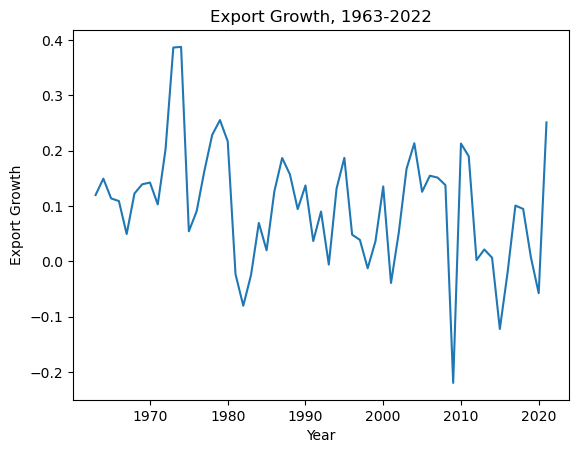

In [15]:
years = range(1963,2022)

plt.plot(years, export_growth_values)
plt.title('Export Growth, 1963-2022')
plt.xlabel('Year')
plt.ylabel('Export Growth')
plt.show()